# Comparison of mutliple root finding methods 

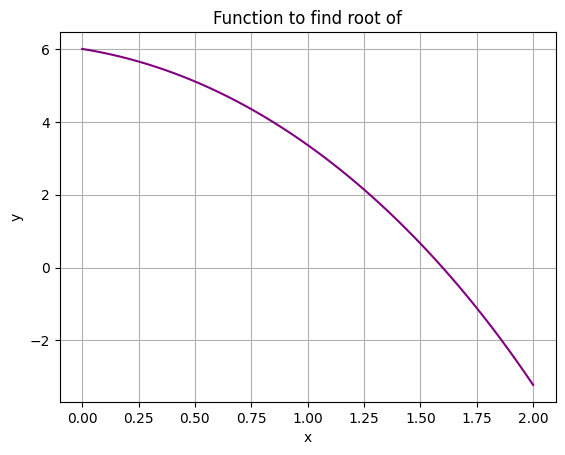

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sympy import symbols, lambdify, diff, exp, cos

#define a function using sympy
x = symbols('x')
function = lambdify(x, cos(x)*+2 + 5 - exp(x))
df = lambdify(x, (cos(x)**2 + 5 - exp(x)).diff(x))

#plot the function 
x_range = np.linspace(0, 2, 100)
plt.plot(x_range, function(x_range), color="purple")
plt.title("Function to find root of")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### Bisection method

In [38]:
#set a and b as the minimum and maximum value x can have 
a = -1
b = 3

#handwritten
def bisection_method(f, a, b, tolerance=1e-12, max_iterations=100): 
    i = 0
    x_m = (a+b)/2 #define initial middle point 

    while (b - a) / 2 > tolerance and i < max_iterations: #run through the loop until the distance between b and a is small enough and the number of iterations big enough
        x_m = (a+b)/2 #calculate x_m
        if (f(x_m) * f(a) < 0): #if this is true the root must be further on the left
            b = x_m #make interval smaller and go back to calculating new x_m
        else: #the root must be further on the right
            a = x_m #make interval smaller and go back to calculating new x_m
        i = i + 1 #add 1 to counter
    print("Root using the bisection method: ", x_m) #print root when f(x_m) = 0 or close enough
    print("Number of iterations needed: ", i) #print number of iterations it took to get to result

bisection_method(function, a, b)


#built in
from scipy.optimize import root_scalar

root = root_scalar(function, method='bisect', bracket=[a, b])
print("Root using built-in function: ", root.root)
print("Number of iterations needed: ", root.iterations)

Root using the bisection method:  1.5983547474406805
Number of iterations needed:  41
Root using built-in function:  1.5983547474406805
Number of iterations needed:  41


### Secant method

In [39]:
#handwritten
def secant_method(f, a, b, tolerance=1e-12, max_iterations=1000):
    i = 0
    x_r = b - f(b)/(f(b)-f(a)) * (b-a) #root of initial secant between point a and b

    while abs(f(x_r)) > tolerance: #proceed until f(x_r) is 0 or close enough 
        x_r = b - f(b)/(f(b)-f(a)) * (b-a) #calculate root between points
        a = b #change point a to b
        b = x_r #change b to x_r
        i = i + 1 #add 1 to counter
    
    print("Root using the secant method: ", x_r) #print root when f(x_r) = 0 or close enough
    print("Number of iterations needed: ", i) #print number of iterations it took to get to result

secant_method(function, a, b)

#built in 
from scipy.optimize import root_scalar

root = root_scalar(function, method='secant', x0 = a, x1 = b)
print("Root using built-in function: ", root.root)
print("Number of iterations needed: ", root.iterations)

Root using the secant method:  1.5983547474391464
Number of iterations needed:  10
Root using built-in function:  1.598354747439146
Number of iterations needed:  10


### False position method

In [40]:
def false_position_method(f, a, b, tolerance=1e-12, max_iterations=1000):
    i = 0 #set the iteration counte to 0
    x_r = b - f(b)/(f(b)-f(a)) * (b-a) #root of initial secant between point a and b
    # x_r = x, b = x_n-1, a = x_n-2
    # a = x_1, b = x_2 -> x_3

    while abs(f(x_r)) > tolerance and i < max_iterations: #stop the loop when f(x_r) is close enough to 0 and the number of iterations is high enough
        x_r = b - f(b)/(f(b)-f(a)) * (b-a) #calculate x_r
        if f(a) * f(x_r) < 0: 
            b = x_r #change the interval 
            i = i + 1 #update the iteration counter
        else: 
            a = x_r #change the interal
            i = i + 1 #update the iteration counter

    print("Root using the false position method: ", x_r) #print root when f(x_r) = 0 or close enough
    print("Number of iterations needed: ", i) #print number of iterations it took to get to result

false_position_method(function, a, b)

#built in
from scipy.optimize import root_scalar

#there is no false position method as such but brentq uses an algorithm similar to it
result = root_scalar(function, method='brentq', bracket=[a, b])

print("Root using built-in function: ", result.root)
print("Number of iterations: ", result.iterations)

Root using the false position method:  1.5983547474390145
Number of iterations needed:  37
Root using built-in function:  1.5983547474391404
Number of iterations:  9


### Newton-Raphson method

In [43]:
#handwritten
def newton_raphson_method(f, a, b, tolerance=1e-12, max_iterations=1000):
    i = 0 #set iteration counter to 0
    x_r = b - f(b)/df(b) #calculate first estimate of the root

    while abs(f(x_r)) > tolerance:
        if i >= max_iterations:  #stop if the maximum number of iterations has been reached
            print("Too many interations, the root may never converge.")
            break #stop loop 
        x_r = b - f(b)/df(b) #update the root estimate
        b = x_r #update the guess
        i = i + 1 #update the iteration counter

    print("Root using the Newton-Raphson method: ", x_r) #print root when f(x_r) = 0 or close enough
    print("Number of iterations needed: ", i) #print number of iterations it took to get to result

newton_raphson_method(function, a, b)

#built in 
from scipy.optimize import root_scalar

root = root_scalar(function, method='newton', fprime=df, x0 = a, x1 = b)

print("Root using built in function: ", root.root)
print("Number of iterations needed: ", root.iterations)


Root using the Newton-Raphson method:  1.5983547474392807
Number of iterations needed:  33
Root using built in function:  1.5983547449943618
Number of iterations needed:  47
